In [ ]:
# Jordans playlist id
    
# 37i9dQZF1EM97HqpxEXHDw?si=2aBnx98_TL-AFqAQ6wtt3Q

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline
import sys
import random

import seaborn as sns

import os
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

username = "1257032170"
scope = 'user-library-read user-top-read user-follow-read playlist-modify-public'

# scope = 'user-library-read user-top-read user-follow-read playlist-modify-public'
# client_id=''
# client_secret=''
# redirect_uri = 'http://127.0.0.1:5000/callback'

In [189]:
# if len(sys.argv) > 1:
#     username = sys.argv[1]
# else:
#     print("Usage: %s username" % (sys.argv[0], ))
#     sys.exit()


# FIX AUTH, THIS IS NO LONGER WORKS

# auth_manager=SpotifyOAuth(scope=scope)    
# token = util.prompt_for_user_token(username='1257032170', scope=scope, client_id=client_id, client_secret=client_secret, redirect_uri='http://127.0.0.1:5000/callback')
# result = {}
# sp = spotipy.Spotify(auth=token)


# token = util.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
# cache_token = token.get_access_token()
# sp = spotipy.Spotify(cache_token)

# if len(sys.argv) > 1:
#     username = sys.argv[1]
# else:
#     print("Usage: %s username" % (sys.argv[0],))
#     sys.exit()
# token = util.prompt_for_user_token(username, scope, client_id="35dd5495aad54936bffa8a9351046258",client_secret="8cc42657ee8b44fd990d6bf8b7ad810f", redirect_uri="https://www.google.com/")
# if token:
#     sp = spotipy.Spotify(auth=token)
#     results = sp.current_user_saved_tracks()
#     for item in results['items']:
#         track = item['track']
#         print(track['name'] + ' - ' + track['artists'][0]['name'])
# else:
#     print("Can't get token for", username)
    
os.environ["SPOTIPY_CLIENT_ID"] = '' # client id
os.environ["SPOTIPY_CLIENT_SECRET"] = '' # Secret ID
os.environ["SPOTIPY_REDIRECT_URI"] = 'https://www.google.com/' # Redirect URI
client_credentials_manager = SpotifyClientCredentials(client_id="SPOTIPY_CLIENT_ID",client_secret="SPOTIPY_CLIENT_SECRET")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
token = util.prompt_for_user_token(username, scope)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)
# where you put your code



In [16]:
# read this csv file, remember to put the full path to
# the directory where you saved the data
df = pd.read_csv('jake_playlist.csv') # df is DataFrame object
print (df.head()) # see the first 5 rows of the loaded table

   Unnamed: 0           artist                                       name  \
0           0        Part Time  Past the Sleeping Guards of the Mausoleum   
1           1   Preoccupations                                Silhouettes   
2           2  Eddie the Wheel                                Lesser Than   
3           3        Part Time                            Animal Machines   
4           4   George Clanton                             King for a Day   

   danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
0         0.760   0.507    1    -9.900     1       0.0413      0.000569  ...   
1         0.203   0.892    4    -6.194     0       0.0637      0.007190  ...   
2         0.413   0.714    1    -7.106     0       0.0293      0.000010  ...   
3         0.646   0.772    2    -9.138     0       0.0335      0.004670  ...   
4         0.515   0.926    0    -3.915     1       0.0457      0.003660  ...   

   liveness  valence    tempo            type           

In [17]:
print (list(df.columns))

['Unnamed: 0', 'artist', 'name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']


# All the features Spotify provides for a given song

In [18]:
print (df.iloc[:,3:14])

    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.760   0.507    1    -9.900     1       0.0413      0.000569   
1          0.203   0.892    4    -6.194     0       0.0637      0.007190   
2          0.413   0.714    1    -7.106     0       0.0293      0.000010   
3          0.646   0.772    2    -9.138     0       0.0335      0.004670   
4          0.515   0.926    0    -3.915     1       0.0457      0.003660   
5          0.566   0.943   10    -4.563     1       0.0511      0.025100   
6          0.690   0.933    9    -5.447     0       0.0432      0.025900   
7          0.604   0.844    3    -6.076     0       0.0314      0.000128   
8          0.674   0.823    0    -8.654     1       0.2020      0.019900   
9          0.322   0.798    6    -5.581     0       0.0399      0.000791   
10         0.435   0.652    7    -7.114     1       0.0312      0.154000   
11         0.644   0.901    4    -7.325     1       0.0313      0.406000   
12         0

### How to take an already existing dataframe and get only certain columns

In [28]:
cols_i_want = ['artist', 'name']
songs[cols_i_want].head(50)

,artist,name
0,Part Time,Past the Sleeping Guards of the Mausoleum
1,Preoccupations,Silhouettes
2,Eddie the Wheel,Lesser Than
3,Part Time,Animal Machines
4,George Clanton,King for a Day
5,George Clanton,Under Your Window
6,Gorillaz,Chalk Tablet Towers (feat. St Vincent)
7,Oneohtrix Point Never,I Don’t Love Me Anymore
8,Arca,Mequetrefe
9,The Chameleons,Perfumed Garden - 2014 Remaster


In [32]:
print(songs.iloc[1])

Unnamed: 0                                                          1
artist                                                 Preoccupations
name                                                      Silhouettes
danceability                                                    0.203
energy                                                          0.892
key                                                                 4
loudness                                                       -6.194
mode                                                                0
speechiness                                                    0.0637
acousticness                                                  0.00719
instrumentalness                                                0.775
liveness                                                         0.37
valence                                                         0.351
tempo                                                          76.653
type                

### Some plotting stuff

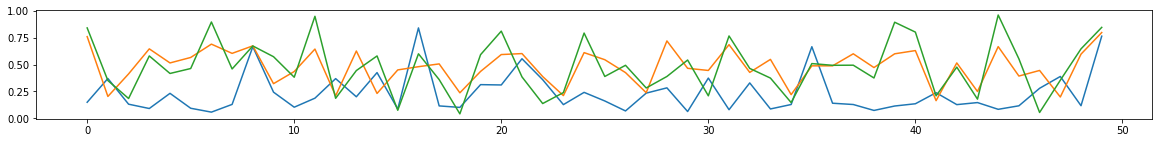

In [18]:
plt.figure(figsize=(20,2))  # can control the size of the display
plt.plot(df['liveness'])
plt.plot(df['danceability']) 
plt.plot(df['valence'])      # display 'Model' attribute

### Making a histogram

<Figure size 360x144 with 0 Axes>

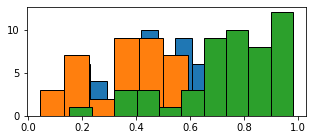

In [10]:
fig = plt.figure(figsize=(5,2))
bins = [1,]
# plt.hist(df['valence'], bins=bins, edgecolor='black');   # ; suppresses Out
fig2 = plt.figure(figsize=(5,2))
plt.hist(df['danceability'], bins=10, edgecolor='black');
plt.hist(df['valence'], bins=10, edgecolor='black');  
plt.hist(df['energy'], bins=10, edgecolor='black');

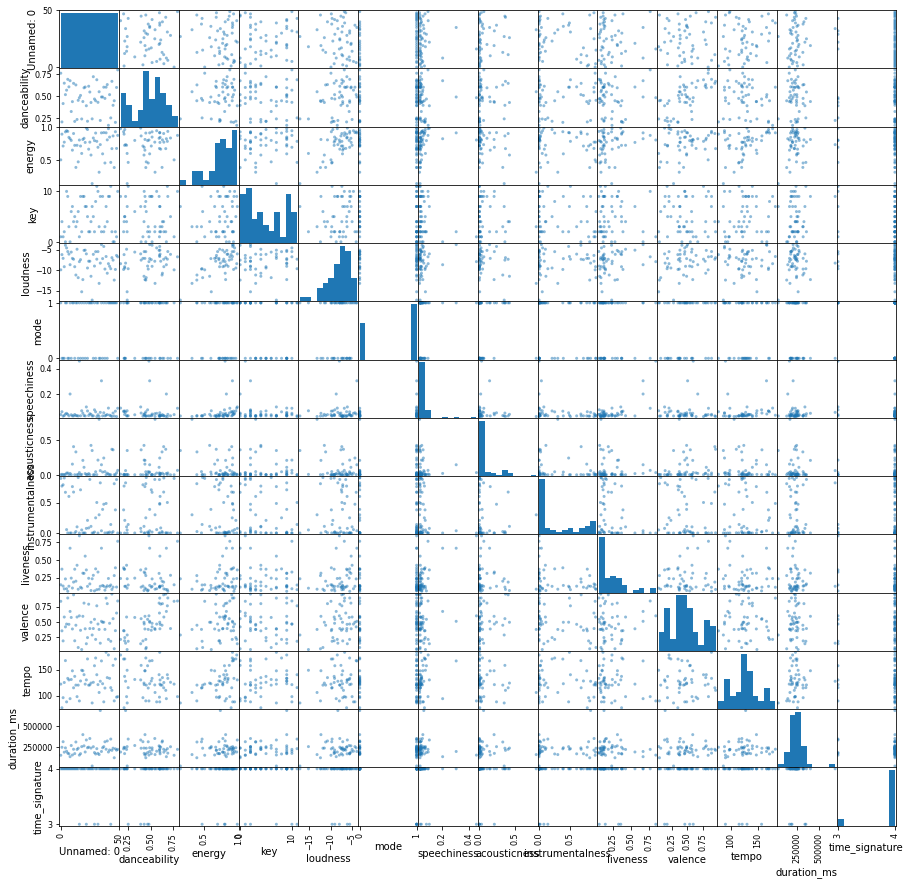

In [16]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

### Getting Jordans playlist

In [116]:

# jake_playlist = sp.playlist(playlist_id='37i9dQZF1EMePFMj0yKReX')
# brandon_playlist = sp.playlist(playlist_id='37i9dQZF1EM50rSrIccR0B')
ash_playlist = sp.playlist(playlist_id='37i9dQZF1EMgoXVAwoV0Ev')
items = []
for track in ash_playlist['tracks']['items']:
    temp = {}
    features = sp.audio_features(track['track']['id'])
    temp['name'] = track['track']['name']
    for feature in features:
        temp.update(feature)
#     print(track['track']['name'])
    items.append(temp)
#     print(" ")
# print(items)
d1 = pd.DataFrame(items)
d2 = pd.DataFrame(items)
# d1.to_csv('jake_platlist_2.csv')
d2.to_csv('ash_playlist.csv')
print(d2)

                          name  danceability  energy  key  loudness  mode  \
0                         July         0.708   0.186    9    -8.953     0   
1                 I Know Alone         0.772   0.658    0    -6.930     1   
2                Cool with You         0.534   0.620    0    -6.775     1   
3              Motion Sickness         0.652   0.545    1    -9.021     1   
4                     Too Good         0.418   0.758    0    -9.370     1   
..                         ...           ...     ...  ...       ...   ...   
95  Ur Name on a Grain of Rice         0.439   0.542    0    -7.667     1   
96               Dead of Night         0.454   0.548    2   -11.618     1   
97                    Kamikaze         0.403   0.650    8    -7.640     0   
98                Scott Street         0.509   0.417   10    -9.632     1   
99                 Fool's Gold         0.737   0.479    9   -10.956     1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo

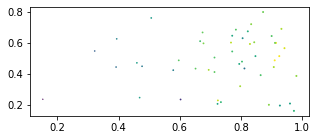

In [69]:
plt.figure(figsize=(5,2))
plt.scatter(df['energy'],df['danceability'], df['energy'], df['loudness']);

# Moving on to the kmeans clustering algorithm related things

### Concat two users top tracks

In [117]:
user1 = pd.read_csv('jake_playlist.csv')
user2 = pd.read_csv('mom_playlist.csv')
jord = pd.read_csv('jordan_playlist.csv')
jake = pd.read_csv('jake_playlist_2.csv')
brandon = pd.read_csv('brandon_playlist.csv')
ash = pd.read_csv('ash_playlist.csv')

temp = [jord, jake]
temp = pd.concat(temp)
temp.reset_index(drop=True,inplace=True)
temp.head(-5)

,Unnamed: 0,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Cherry-coloured Funk,0.377,0.650,2,-5.902,1,0.0290,0.001740,0.000057,0.1070,0.365,180.074,audio_features,6sVQNUvcVFTXvlk3ec0ngd,spotify:track:6sVQNUvcVFTXvlk3ec0ngd,https://api.spotify.com/v1/tracks/6sVQNUvcVFTX...,https://api.spotify.com/v1/audio-analysis/6sVQ...,192467,4
1,1,Lipstick,0.469,0.856,3,-2.365,0,0.0354,0.000494,0.000353,0.2660,0.795,134.943,audio_features,2i1nmBnMkDGFTTjeGGIOTm,spotify:track:2i1nmBnMkDGFTTjeGGIOTm,https://api.spotify.com/v1/tracks/2i1nmBnMkDGF...,https://api.spotify.com/v1/audio-analysis/2i1n...,200293,4
2,2,Another Weekend,0.383,0.513,6,-5.377,0,0.0278,0.125000,0.000123,0.2410,0.388,108.536,audio_features,2gPFK3pmM7zzws174NrjkG,spotify:track:2gPFK3pmM7zzws174NrjkG,https://api.spotify.com/v1/tracks/2gPFK3pmM7zz...,https://api.spotify.com/v1/audio-analysis/2gPF...,254520,4
3,3,Cigarettes out the Window,0.626,0.659,0,-5.669,1,0.0337,0.121000,0.000000,0.1700,0.594,113.551,audio_features,5GKekzF1YcR2DQd9c3DI8y,spotify:track:5GKekzF1YcR2DQd9c3DI8y,https://api.spotify.com/v1/tracks/5GKekzF1YcR2...,https://api.spotify.com/v1/audio-analysis/5GKe...,198961,4
4,4,Fifty-fifty Clown,0.485,0.700,0,-7.403,0,0.0272,0.046300,0.109000,0.1110,0.393,180.119,audio_features,502mpBRHf3IluC4xxr4xCY,spotify:track:502mpBRHf3IluC4xxr4xCY,https://api.spotify.com/v1/tracks/502mpBRHf3Il...,https://api.spotify.com/v1/audio-analysis/502m...,190213,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,90,Under Your Window,0.566,0.943,10,-4.563,1,0.0511,0.025100,0.056600,0.0931,0.463,87.957,audio_features,7x8gYowWkyq88iwEUidjXv,spotify:track:7x8gYowWkyq88iwEUidjXv,https://api.spotify.com/v1/tracks/7x8gYowWkyq8...,https://api.spotify.com/v1/audio-analysis/7x8g...,205296,4
191,91,Bunker Buster,0.545,0.772,2,-7.807,1,0.0482,0.001400,0.884000,0.1610,0.389,120.421,audio_features,7rqZJ8JM8nlNHb4p8eCSTR,spotify:track:7rqZJ8JM8nlNHb4p8eCSTR,https://api.spotify.com/v1/tracks/7rqZJ8JM8nlN...,https://api.spotify.com/v1/audio-analysis/7rqZ...,355989,4
192,92,Golden Age Saturday,0.636,0.815,0,-6.485,1,0.0752,0.025400,0.000146,0.1670,0.940,139.788,audio_features,0tt3EP7bPHlhKqkg7TG4Yr,spotify:track:0tt3EP7bPHlhKqkg7TG4Yr,https://api.spotify.com/v1/tracks/0tt3EP7bPHlh...,https://api.spotify.com/v1/audio-analysis/0tt3...,192707,4
193,93,Sun Poisioning,0.249,0.469,11,-9.632,1,0.0322,0.000463,0.141000,0.1460,0.178,115.239,audio_features,3eO4QTkP33KfhI1KiMMiUv,spotify:track:3eO4QTkP33KfhI1KiMMiUv,https://api.spotify.com/v1/tracks/3eO4QTkP33Kf...,https://api.spotify.com/v1/audio-analysis/3eO4...,349321,3


In [118]:

user1_list = []
for song in jord['id']:
    row = pd.DataFrame(sp.audio_features(tracks=[song]))
    user1_list.append(row)
user1_df = pd.concat(user1_list)

user2_list = []
for song in jake['id']:
    row = pd.DataFrame(sp.audio_features(tracks=[song]))
    user2_list.append(row)
user2_df = pd.concat(user2_list)

# Combine both users' top 50 songs into one dataframe of 100 songs

dfs = [user1_df, user2_df]
dfs = pd.concat(dfs)
dfs.size

3600

### Genre comparison

In [190]:
artist_ids = []
for song in brandon['id']:
    s = sp.track(song)
    a = s['artists']
    for artist in a:
        temp_id = artist["id"]
        if temp_id not in artist_ids:
            artist_ids.append(artist["id"])

for song in jake['id']:
    s = sp.track(song)
    a = s['artists']
    for artist in a:
        temp_id = artist["id"]
        if temp_id not in artist_ids:
            artist_ids.append(artist["id"])

print(artist_ids)


['6hG0VsXXlD10l60TqiIHIX', '2xvtxDNInKDV4AvGmjw6d1', '2wPDbhaGXCqROrVmwDdCrK', '67lytN32YpUxiSeWlKfHJ3', '4TMHGUX5WI7OOm53PqSDAT', '4wQ3PyMz3WwJGI5uEqHUVR', '1G5v3lpMz7TeoW0yGpRQHr', '2CSEKlTT9empsZ8vZWsrKO', '4mtHSXwIHihO6MWNq5Qoko', '4vpDg7Y7fU982Ds30zawDA', '5H0YoDsPDi9fObFmJtTjfN', '3cGojc1Yu89IHXx8OeSnee', '7JDSHlDdVTo7aZKdQZ53Vf', '0qu422H5MOoQxGjd4IzHbS', '1jofoMyHK5JjLIESpm991n', '2GATzeg62cr6sH29wSOVWe', '6lcwlkAjBPSKnFBZjjZFJs', '3K40SMapVhc8PxyYFofHff', '1Xyo4u8uXC1ZmMpatF05PJ', '1aDpQ3bo57IlYWmsG5sdlp', '5R5MLOQbI4lb7GHYioPqoN', '3MZsBdqDrRTJihTHQrO6Dq', '5KDIH2gF0VpelTqyQS7udb', '7FBcuc1gsnv6Y1nwFtNRCb', '5AyEXCtu3xnnsTGCo4RVZh', '4frXpPxQQZwbCu3eTGnZEw', '13PoSkMaBxmC6EeAu2oBhH', '6Ghvu1VvMGScGpOUJBAHNH', '4OdKVXxhqKvBH0rNyv5hn0', '2gAaA8XU9yOXCgSbAQBdHO', '6U1lmwvy3I9dIYu9RalJi6', '6Nii4K84ZzBZS8X2MP8c9t', '2JzhQYGos3RqV7MT5fWeek', '7ppwXAQNWfPDGu22hCk5Yr', '1S0vL284jxZYKtZQ2jsQ2X', '38zTZcuN7nFvVJ6auhc6V3', '6JSb5J8LvV71EKJDqeitwf', '6sHCvZe1PHrOAuYlwTLNH4', '25CgccXK9h

In [191]:
counter = {}

for art_id in artist_ids:
    artist = sp.artist(art_id)
    genres = artist["genres"]
    for genre in genres:
        if genre not in counter.keys():
            counter[genre] = 1
        else:
            counter[genre] += 1
#         c.update(genre)
#         print(genre)
#     print(" ")
#     print(genres)
print(counter)

{'escape room': 6, 'glitchcore': 3, 'hyperpop': 2, 'underground hip hop': 5, 'emo rap': 3, 'vapor trap': 2, 'ambient': 1, 'art pop': 12, 'chamber psych': 2, 'chillwave': 14, 'dream pop': 16, 'drone': 1, 'electronica': 4, 'experimental pop': 9, 'fluxwork': 2, 'fourth world': 1, 'freak folk': 13, 'hauntology': 1, 'intelligent dance music': 2, 'microhouse': 3, 'outsider house': 1, 'vaporwave': 2, 'psychedelic hip hop': 1, 'classic rock': 3, 'cosmic american': 2, 'country rock': 3, 'double drumming': 2, 'folk rock': 3, 'jam band': 3, 'psychedelic rock': 3, 'rock': 6, 'roots rock': 3, 'album rock': 2, 'blues rock': 2, 'electric blues': 1, 'hard rock': 1, 'mellow gold': 2, 'soft rock': 2, 'southern rock': 1, 'dark post-punk': 5, 'nu gaze': 16, 'abstract': 1, 'bass music': 1, 'drill and bass': 1, 'electro': 1, 'ninja': 1, 'trip hop': 1, 'classic canadian rock': 1, 'folk': 1, 'heartland rock': 1, 'swamp rock': 1, 'alternative dance': 10, 'indie garage rock': 18, 'indie pop': 12, 'la indie': 1,

### Get genres from generated playlist

In [192]:
gen_playlist = sp.playlist(playlist_id='3V8n0rZJVlB34y7O477Vt1')
track_ids = []
for track in gen_playlist['tracks']['items']:
# #     print(track)
#     print(track['track']['id'])
#     print(" ")
    track_ids.append(track['track']['id'])
# print(track_ids)



artist_ids_2 = []
for song in track_ids:
    s = sp.track(song)
    a = s['artists']
    for artist in a:
        temp_id = artist["id"]
        if temp_id not in artist_ids_2:
            artist_ids_2.append(artist["id"])
# print(artist_ids_2)




# playlist_counter = {}
# for art_id in artist_ids:
#     artist = sp.artist(art_id)
#     genres = artist["genres"]
#     for genre in genres:
#         if genre not in counter.keys():
#             counter[genre] = 1
#         else:
#             counter[genre] += 1
# #         c.update(genre)
# #         print(genre)
# #     print(" ")
# #     print(genres)
# print(counter)

In [193]:
playlist_counter = {}
for art_id in artist_ids_2:
    artist = sp.artist(art_id)
    genres = artist["genres"]
    for genre in genres:
        if genre not in playlist_counter.keys():
            playlist_counter[genre] = 1
        else:
            playlist_counter[genre] += 1
#         c.update(genre)
#         print(genre)
#     print(" ")
#     print(genres)
print(playlist_counter)

{'chillwave': 9, 'escape room': 10, 'experimental hip hop': 5, 'psychedelic hip hop': 1, 'underground hip hop': 9, 'wave': 1, 'witch house': 1, 'alternative emo': 1, 'emo': 2, 'indie punk': 1, 'melodic hardcore': 1, 'pop punk': 1, 'alternative dance': 3, 'dream pop': 8, 'indie pop': 5, 'indie rock': 7, 'indietronica': 1, 'metropopolis': 2, 'nu gaze': 6, 'shimmer pop': 3, 'vapor soul': 1, 'baltimore indie': 1, 'freak folk': 10, 'transpop': 1, 'hyperpop': 3, 'bedroom pop': 3, 'chamber psych': 3, 'garage psych': 3, 'hull indie': 1, 'emo rap': 2, 'glitchcore': 3, 'vapor trap': 4, 'art pop': 7, 'electronica': 5, 'alternative hip hop': 2, 'hip hop': 4, 'industrial hip hop': 2, 'rap': 3, 'indie garage rock': 2, 'alternative metal': 2, 'alternative rock': 4, 'blues rock': 2, 'modern rock': 2, 'nu metal': 2, 'palm desert scene': 1, 'rock': 1, 'stoner metal': 1, 'stoner rock': 1, 'one-person band': 1, 'quebec indie': 1, 'art rock': 1, 'experimental': 1, 'experimental rock': 2, 'industrial': 1, '

In [194]:
generated_playlist_df = pd.DataFrame.from_dict(playlist_counter, orient='index', columns=['genre'])
print(generated_playlist_df.sort_values(['genre'], ascending=False).head(60))

                            genre
freak folk                     10
escape room                    10
chillwave                       9
underground hip hop             9
dream pop                       8
art pop                         7
indie rock                      7
nu gaze                         6
experimental hip hop            5
electronica                     5
indie pop                       5
hip hop                         4
vapor trap                      4
alternative rock                4
alternative dance               3
hyperpop                        3
rap                             3
outsider house                  3
glitchcore                      3
intelligent dance music         3
dance-punk                      3
chamber psych                   3
bedroom pop                     3
garage psych                    3
shoegaze                        3
vaporwave                       3
shimmer pop                     3
microhouse                      2
nu metal      

In [195]:
test_df = pd.DataFrame.from_dict(counter, orient='index', columns=['genre'])
print(test_df.sort_values(['genre'], ascending=False).head(60))

                     genre
indie rock              19
indie garage rock       18
nu gaze                 16
dream pop               16
chillwave               14
freak folk              13
indie pop               12
art pop                 12
alternative dance       10
experimental pop         9
neo-psychedelic          7
alternative rock         7
modern rock              7
garage psych             6
escape room              6
rock                     6
uk post-punk             6
indie punk               5
new rave                 5
underground hip hop      5
bubblegrunge             5
dark post-punk           5
lo-fi                    4
lo-fi indie              4
post-punk                4
noise pop                4
shoegaze                 4
new wave                 4
electronica              4
jam band                 3
classic rock             3
bedroom pop              3
emo rap                  3
electropop               3
art rock                 3
shimmer pop              3
g

<AxesSubplot:>

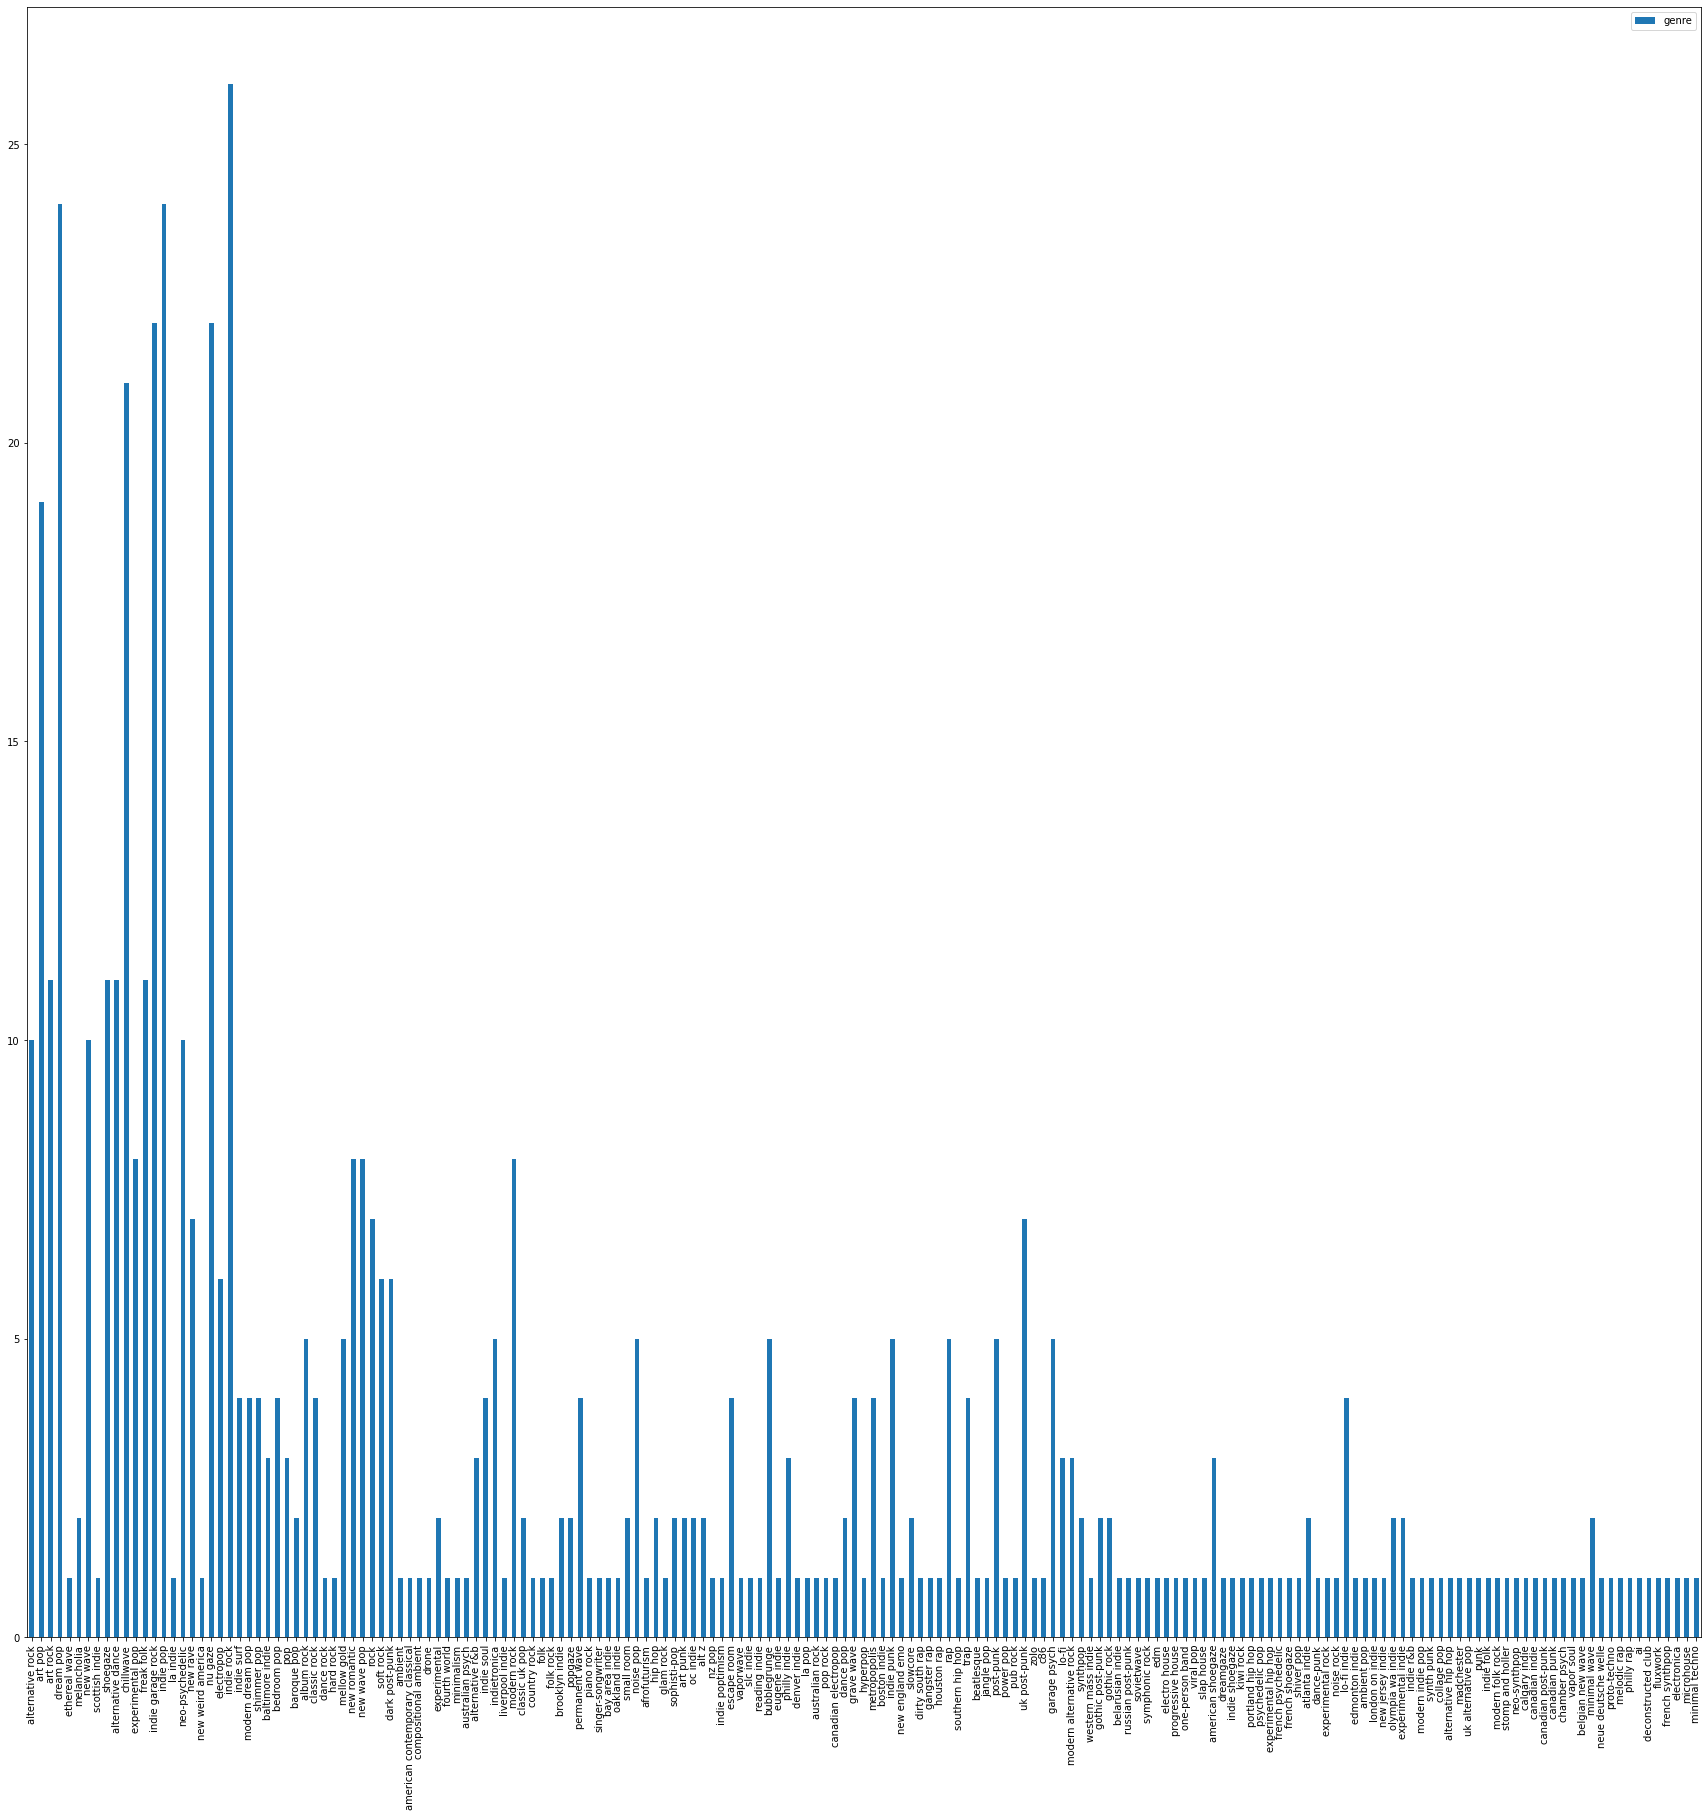

In [132]:
test_df.plot.bar(figsize=(30, 30))
# test_df.groupby('genre').count.genre.plot.bar()
# dfs.groupby('cluster').count()
# dfs.groupby('cluster').count().danceability.plot.bar()

### Drop unused columns

In [119]:
dfs.drop(['type','track_href','analysis_url','time_signature','duration_ms','uri','instrumentalness','liveness','loudness','key','mode'],1,inplace=True)
dfs.set_index('id',inplace=True)
dfs.head(3)

,danceability,energy,speechiness,acousticness,valence,tempo
id,,,,,,
6sVQNUvcVFTXvlk3ec0ngd,0.377,0.650,0.0290,0.001740,0.365,180.074
2i1nmBnMkDGFTTjeGGIOTm,0.469,0.856,0.0354,0.000494,0.795,134.943
2gPFK3pmM7zzws174NrjkG,0.383,0.513,0.0278,0.125000,0.388,108.536


### Normalize tempo feature

In [121]:
# Normalize tempo feature
columns = ['danceability','energy','speechiness','acousticness','valence','tempo']
scaler = MinMaxScaler()
scaler.fit(dfs[columns])
dfs[columns] = scaler.transform(dfs[columns])
dfs.head(3)
print(dfs['id'])

KeyError: 'id'

In [121]:
dfs.describe()

,danceability,energy,speechiness,acousticness,valence,tempo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.490450,0.604427,0.068954,0.250828,0.492868,0.401401
std,0.181243,0.217674,0.105281,0.290960,0.245158,0.210913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.362125,0.462629,0.017008,0.020525,0.281516,0.243780
50%,0.503911,0.619845,0.034245,0.112436,0.494770,0.380330
75%,0.617992,0.776418,0.078258,0.413143,0.655451,0.533528
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distributions of Combined Audio Features


<AxesSubplot:xlabel='tempo', ylabel='Density'>

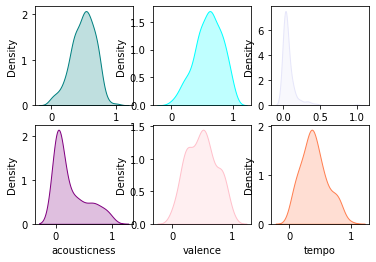

In [122]:
# Visualizing distribution of audio features of our combined songs
print("Distributions of Combined Audio Features")
plt.subplot(2,3,1)
sns.kdeplot(data=dfs.danceability,shade=True,color='teal')
plt.subplot(2,3,2)
sns.kdeplot(data=dfs.energy,shade=True,color='cyan')
plt.subplot(2,3,3)
sns.kdeplot(data=dfs.speechiness,shade=True,color='lavender')
plt.subplot(2,3,4)
sns.kdeplot(data=dfs.acousticness,shade=True,color='purple')
plt.subplot(2,3,5)
sns.kdeplot(data=dfs.valence,shade=True,color='pink')
plt.subplot(2,3,6)
sns.kdeplot(data=dfs.tempo,shade=True,color='coral')

# Kmeans algorithm

In [110]:
# Get 20 clusters from 100 songs

clusters = 20
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(dfs)
len(kmeans.labels_)

ValueError: could not convert string to float: 'audio_features'

In [124]:
from sklearn.decomposition import PCA

pca = PCA(3) 
pca.fit(dfs) 
  
pca_data = pd.DataFrame(pca.transform(dfs)) 
  
print(pca_data.head())

          0         1         2
0  0.993204  0.014608 -0.214108
1 -0.044072  0.024818 -0.069212
2 -0.160102 -0.026385 -0.164380
3  0.570166 -0.219763  0.117697
4  0.010745 -0.026473  0.011953


In [125]:
from matplotlib import colors as mcolors 
import math 
   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips]

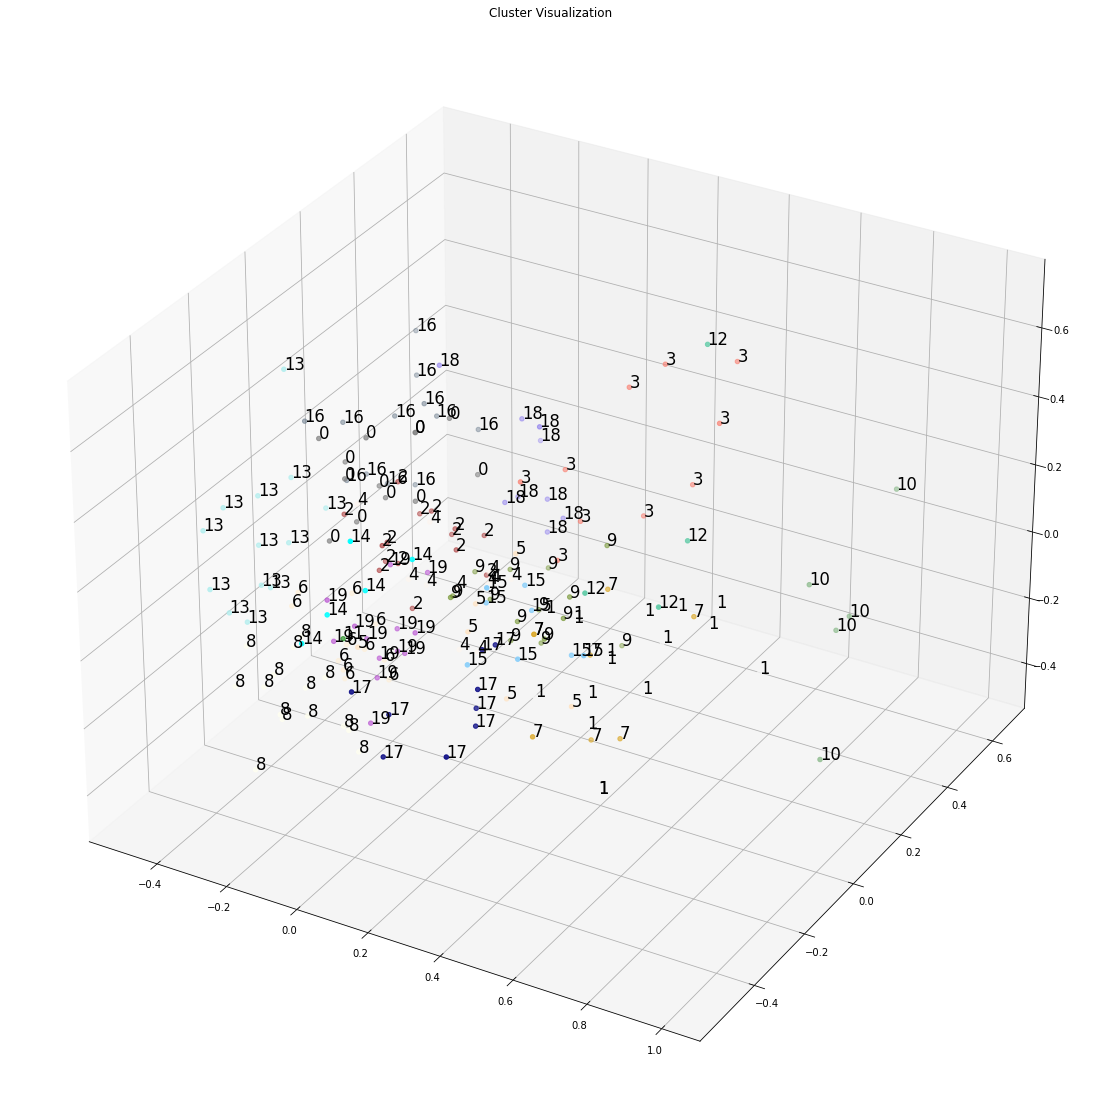

In [126]:

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
   
fig = plt.figure(figsize=(20,20)) 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
plt.title("Cluster Visualization")
plt.show()

In [127]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfs)
y_kmeans = kmeans.fit_predict(scaled)
y_kmeans

array([ 4, 10, 16,  1, 13, 11, 13,  1,  7, 10,  8, 19,  9,  5, 11, 11,  4,
        6, 11, 11, 16,  3, 12,  1, 13,  8, 11, 12,  0, 16, 15, 15,  3, 14,
        3,  5, 15, 10,  6,  3, 11,  1, 14, 15,  7,  6,  8,  7,  9,  5,  9,
        7,  5,  3,  1,  4,  1, 11, 11, 11, 12,  4,  9, 12, 15, 14,  3, 10,
       16,  1,  7,  5,  2,  5, 10, 15,  2,  6,  7, 12, 15,  5, 16, 16, 13,
       14,  4,  8,  1, 16,  6, 13, 11,  9, 15,  8,  9,  0,  4,  9,  5,  0,
       13, 12, 11, 10, 11, 12, 13, 19,  6,  0,  2, 14,  0,  2, 13, 14,  9,
        2,  2, 17,  2, 11,  0, 14,  5,  6, 11,  1, 14,  1,  7,  0,  3, 10,
       14,  2, 17,  5,  2,  1, 14,  2, 17,  0,  2, 10, 14, 12, 13, 13,  5,
       15, 12,  3,  2, 13,  2, 16, 16, 16, 16, 15,  5,  9, 17,  1, 11, 13,
        2, 14, 19,  6, 19,  5, 18,  0,  2,  0, 17,  2, 17, 12,  0,  3,  2,
       11, 12, 17, 17, 11, 14,  0, 19, 12,  2, 14, 16, 15], dtype=int32)

In [128]:

# Updating dataframe with assigned clusters 

dfs['cluster'] = y_kmeans
# dfs['artist'] = temp.artist.tolist()
dfs['title'] = temp.name.tolist()
# print(dfs)

In [114]:
# Checking out the number of songs in each cluster

dfs.groupby('cluster').count()

KeyError: 'cluster'

KeyError: 'cluster'

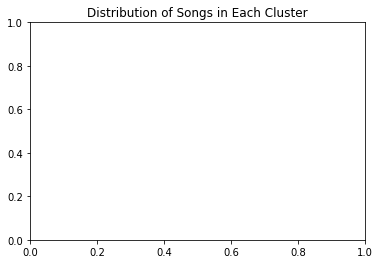

In [107]:
plt.title("Distribution of Songs in Each Cluster")
dfs.groupby('cluster').count().danceability.plot.bar()
print(dfs)

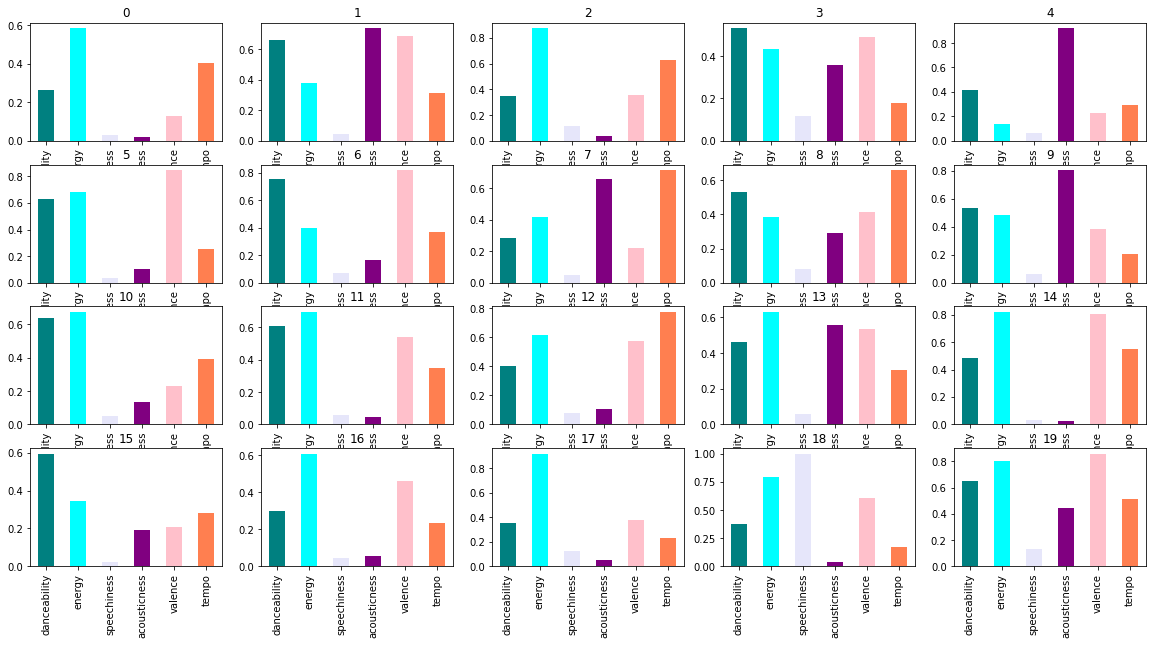

In [131]:

i=0
fig=plt.figure(figsize=(20,10))
while i<20:
    plt.subplot(4,5,i+1)
    dfs.loc[dfs.cluster==i].mean().drop('cluster').plot.bar(color=['teal','cyan','lavender','purple','pink','coral'])
    plt.title(str(i))
    i+=1

In [133]:

# Removing clusters that only have one song in them

delete_clusters = []
cluster = 0
while cluster < (len(dfs.cluster.unique())-1):
    if dfs.groupby('cluster').count().loc[cluster].danceability == 1:
        delete_clusters.append(cluster)
    cluster+=1
    
delete_clusters

[18]

In [134]:
dfs.reset_index(inplace=True)

In [135]:
i = 0
while i < (len(dfs.cluster.unique())-1):
    if dfs.loc[[i]].cluster.tolist()[0] in delete_clusters:
        dfs.drop(i,0,inplace=True)
    i+=1

In [136]:
dfs.set_index('id',inplace=True)

In [137]:
i=0
list_of_recs = [0]*len(dfs.groupby('cluster').count())
while i<len(dfs.groupby('cluster').count()):
#     print(dfs['artist'] + " - " + dfs['title'])
    list_of_recs[i] = dfs.loc[dfs['cluster'] == i].index.to_list()
    i+=1

list_of_recs = [ele for ele in list_of_recs if ele != []] 
len(list_of_recs)
# print(dfs)

20

In [138]:
# print(list_of_recs)

i = 0
for arr in list_of_recs:
    print("cluser #" + str(i))
    for item in arr:
        track = sp.track(item)
        print(track['name'])
    i+=1
    print(" ")

cluser #0
Witchcraft
Kamikaze
Orange Peeler
can i receive the contact?
Diving Woman
fell asleep with a vision
Ditch
Alone Tonight
Ode
Famous or Dead
Lesser Than
Sun Poisioning
 
cluser #1
Motion Sickness
Way to be Loved
Sofia
Day from Night
When U Loved Me
Different State of Mind
Hunnybee
Leaning On You
Babyyy
Cruel Summer
When U Loved Me
Man Of Oil
 
cluser #2
Blinding Lights
Heartless
Thy Mission
I Ran (So Far Away)
Gretel
Factory Boy
Time To Live
Make It Forever
Leave Behind
New Ways
PINK
Long Flight
The Cutter
Moans
Death
King for a Day
Throw It Away
Perfumed Garden - 2014 Remaster
 
cluser #3
Summer Girl - Bonus Track
Take Me Home, Country Roads (ft. Waxahatchee)
Toronto
Old Bone - Jim-E Stack Remix
You Were
Hope
Round And Round
Poison Root
Hope
 
cluser #4
July
Garden Song
Lost In A Dream
Kinfolk
Ally Mcbeal
Scott Street
 
cluser #5
3 AM
One Eye Open
Mixer
Love You For A Long Time
Ain't Together
Devil’s Advocate
Borderline
Changes
House Of Yesterday
Dark Angel
Aries (feat. Peter 

In [147]:
j = 0
adj_list_of_recs = [0]*len(list_of_recs)
while j<len(list_of_recs):
    if 0 < len(list_of_recs[j]) < 6:
        adj_list_of_recs[j] = list_of_recs[j]
    elif len(list_of_recs[j]) > 5:
        adj_list_of_recs[j] = random.sample(list_of_recs[j], 5)
    j += 1

len(adj_list_of_recs)

20

In [148]:

#Getting 1 recommended song from each cluster with less than 4 songs, 2 recommended songs from each cluster with 4-5 songs

k = 0
list_of_recommendations = [0]*len(list_of_recs)
while k < len(list_of_recs):
    if len(adj_list_of_recs[k]) < 4:
        list_of_recommendations[k] = sp.recommendations(seed_tracks=adj_list_of_recs[k],limit=1)
    else:
        list_of_recommendations[k] = sp.recommendations(seed_tracks=adj_list_of_recs[k],limit=2)
    k += 1
    
pd.json_normalize(list_of_recommendations[15], record_path='tracks').id
# print(list_of_recommendations)

0    5Po5YmT4RhawSeqNXx5m0o
1    6vw4YLRXNvtFxA2yxVrR6H
Name: id, dtype: object

In [149]:
list_of_recommendations_converted = [0]*len(list_of_recs)

l = 0
while l < len(list_of_recs):
    list_of_recommendations_converted.append(pd.json_normalize(list_of_recommendations[l], record_path='tracks').id.tolist())
    l += 1

no_integers = [x for x in list_of_recommendations_converted if not isinstance(x, int)]
list_of_recommendations_converted = [item for elem in no_integers for item in elem]

len(list_of_recommendations_converted)
print(list_of_recommendations_converted)

for track in list_of_recommendations_converted:
    t = sp.track(track)
    print(t['name'])

['0glyuEiAzmJCbLPGWeqv8k', '4iow42ixA2Xk6SGWFBvbzB', '3GOO81yxm6EZLkiXLs2sx2', '65tjr5cWJmsA8KHVvuC7b2', '0IpxdHYUGxYvhZTeCdppH6', '5sbtfKO4klHa0ou42Jz8uN', '4m768qH9dQoLGWp3t7xr86', '5oNE1olhKsyCjLJslVBghX', '5I6y1KWmUoV5YCaIEcs1qs', '5d9UnCpbhC37BnuP75irLE', '01TyFEZu6mHbffsVfxgrFn', '0CZ8lquoTX2Dkg7Ak2inwA', '2fTdRdN73RgIgcUZN33dvt', '0NhQdPI9J9zfmSfn3XpYAY', '5VpgaWuqcWho0uJMniRNDs', '31C5Sv5mxGp3caVYmKYBYA', '7xQAfvXzm3AkraOtGPWIZg', '0KKkJNfGyhkQ5aFogxQAPU', '00I1QKvKaAikK5joEW92Zd', '3PbV3ocgAp3Xn0omGFC0cG', '6wjm92jBZapfiplQS4XV0X', '1AtSdzyt3vsGUVSk5wb44Z', '4Oun2ylbjFKMPTiaSbbCih', '1MhXdlCQPnO56T57MfmaRm', '0Gb3XKqIbhPmaF11H8WEYs', '31wJAo5ACBcxZAsdTwxy5Z', '1boXOL0ua7N2iCOUVI1p9F', '3EZvhNCLA30qUZT2LMDYRL', '0IgYi2ysE5iSgQjJNLZfFt', '43kRR7EBnfjSauQZEDtZV8', '5Po5YmT4RhawSeqNXx5m0o', '6vw4YLRXNvtFxA2yxVrR6H', '4YW1KY7SuHca5CRvBs6QZs', '2CAhV5ZuA7v309SspF5K5S', '54jUzTyKnfpouJMuEgcO1s', '6rBmXagRa2mmBteQxISjS9', '0pgS3J6Vyt1VKrUI0MUeNG', '7oehvCncYQ4gAQxrlUMr2t', '4HIAtcFGSi

In [142]:
new_playlist = sp.user_playlist_create(sp.current_user()['id'], name='kmeans algorithm test 5 (Ash - Jake)', public=True, collaborative=False, description='')

In [143]:
sp.user_playlist_add_tracks(username, new_playlist['id'], list_of_recommendations_converted, position=None)

{'snapshot_id': 'MixhYWViZWUwNjIwMmU4YTNjMWQzMmQzMzU0ZWI2NTI3ZTE5NDgyOGE1'}